# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-MNIST.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-MNIST.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
tf.keras.__version__

'2.9.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

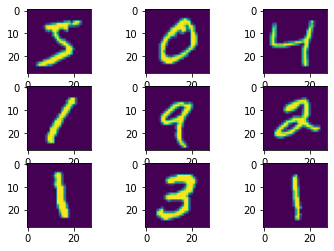

(60000, 28, 28)

In [ ]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

In [ ]:
# Single color channel assignment
X_train = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# One hot encode target values
y_train = keras.utils.to_categorical(y_train_full)
y_test = keras.utils.to_categorical(y_test)
# Reduce the amount of data
X_train = X_train_full.astype('float32')
X_test = X_test.astype('float32')
# Normalisation
X_train = X_train / 255.0
X_test = X_test / 255.0
# Get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train.shape[0])
X_valid, X_train = X_train[shuffled_indices[:5000]], X_train[shuffled_indices[5000:]]
y_valid, y_train = y_train[shuffled_indices[:5000]], y_train[shuffled_indices[5000:]]

## Build and train the model

Build and train your model. 

In [ ]:
# TODO: Build your model
def Modeling():
  model = tf.keras.Sequential()
  model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(keras.layers.MaxPooling2D((2, 2)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(keras.layers.Dense(10, activation='sigmoid'))
  opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model
model = Modeling()

In [ ]:
# show the structure of your model
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 5408)              0         
                                                                 
 dense_20 (Dense)            (None, 100)               540900    
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_______________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid), verbose=0)

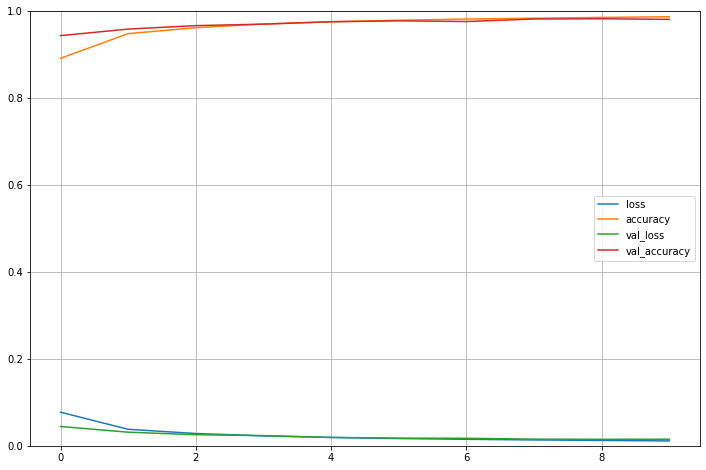

In [ ]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [91]:
model.save('FDS22-M001-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [92]:
model = keras.models.load_model("FDS22-M001-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0134 - accuracy: 0.9811


[0.013444331474602222, 0.9811000227928162]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as why you use x number layers and the difficulties you met. 

In this task, we train the convolutional neural network model on the MNIST data and evaluate the efficiency. In the data processing part, the color of each pixel of the image firstly is decomposed into three different color channels by reshaping. Then the method of using **one hot encode** is to convert each label of y_train and y_test into a vector consisting of 0 and 1, which can be converted into a value that can be recognized by the model. We then perform **normalization** on the data, which can help us convert all features into a similar value range (0-1), thus making the training of the model smoother.
Then we tried to build a 3*3 kernel convolutional layer and two fully connected layer model for training. After constructing the training model, we tested it but the program reported an error "ValueError: Shapes () and () are incompatible" and then we performed the inspection and found that the activation function uses softmax, but we have already changed the output label to binary (by one hot), so we changed the activation function Sigmoid. After realizing this problem, we also changed the value of the loss variable to binary_crossentropy. Finally the model was successfully evaluated and got a good score of 98.11%.